# EDA with python and applyin logistic Regression

For this we will be working with the **Titanic Data set from kaggle** this is vary famous data set and very often is a student first step in meachine learning

we be tring to predict a classification survival or deceased .Let's begin our understanding of implemention Logistic Regression  in python for classification.

we'll use "semo-cleaned" version of titanoc data set . if you use the data set hosing  directly on kaggle, you may need to do some addition cleaning

# Import libraries
let's import some libraries to get started!


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# the data load 
let's start by reading in the titanic_train.csv file into pandas dataframe

In [159]:
df=pd.read_csv("titanic_train.csv")

In [160]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory data Anaalysis
let's begin some exploratory data analysis . we'll start by checking null or missing data.

# Missing Data or null values

we can use seaborn to create a simple haetmap to see where we are missing data !

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [162]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

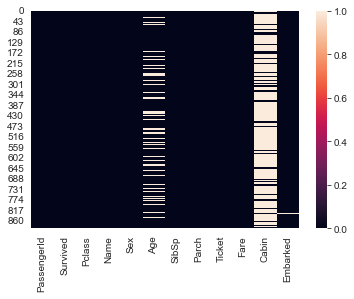

In [164]:
sns.heatmap(df.isnull())

<AxesSubplot:>

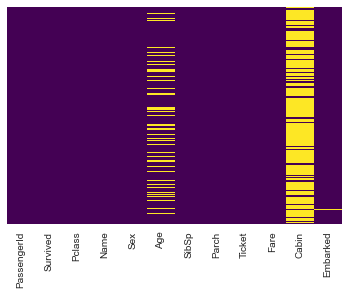

In [165]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:xlabel='Survived', ylabel='count'>

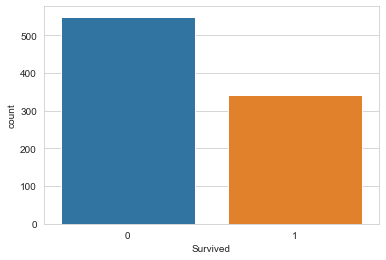

In [166]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

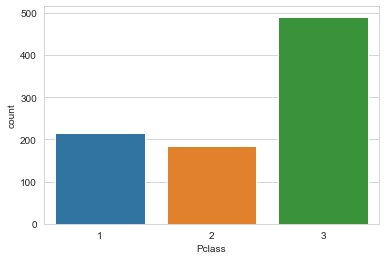

In [167]:

sns.countplot(x="Pclass",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

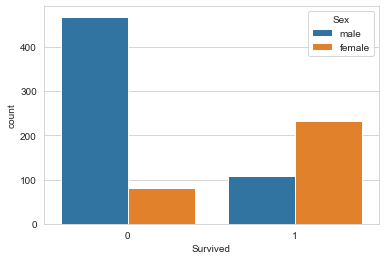

In [168]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

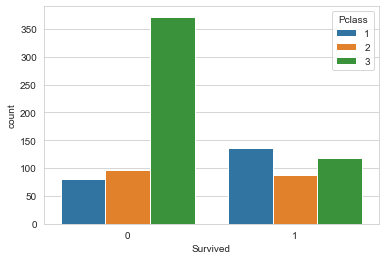

In [169]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=df)

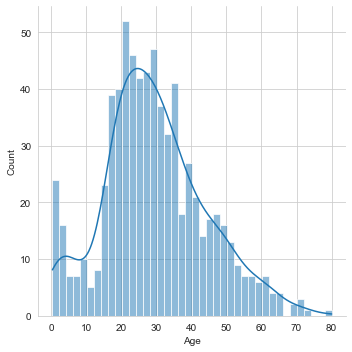

In [170]:
sns.displot(df["Age"].dropna(),kde=True,bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

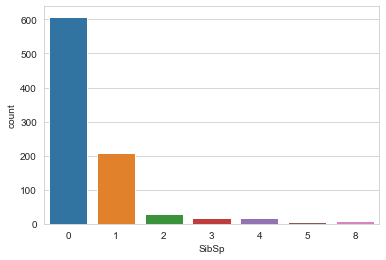

In [171]:
sns.countplot(x="SibSp",data=df)

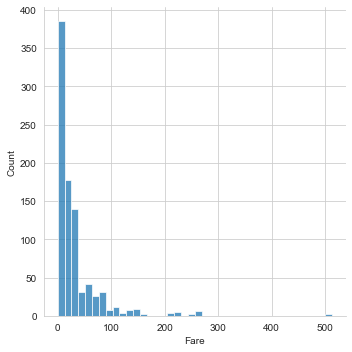

In [172]:
sns.displot(df["Fare"].dropna(),kde=False,bins=40)

# Data Cleaning 

we want to fill missing age data instead of just droping the missing age data rows . one way to do this is filling in the mean age of all the passengers (imputation). however we can be smartr about this and check the average age by passenger class . for example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

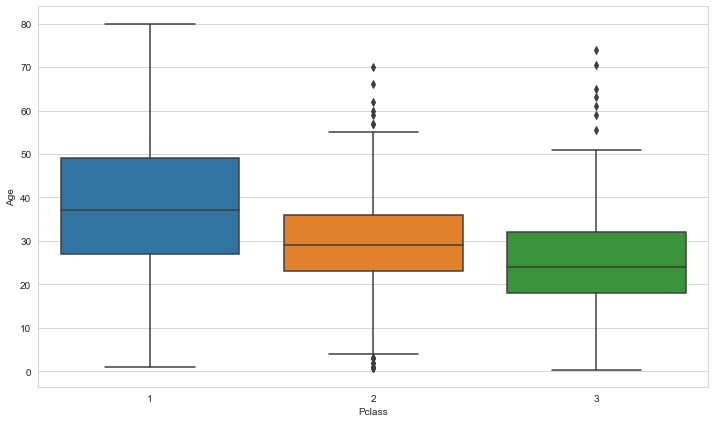

In [173]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=df)

In [174]:
def adding_null(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [175]:
df["Age"]= df[["Age","Pclass"]].apply(adding_null,axis=1)

<AxesSubplot:>

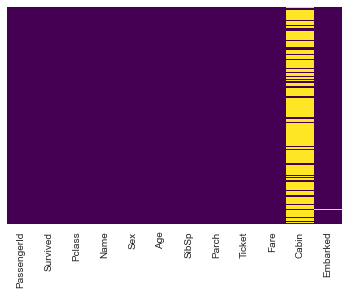

In [176]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis",cbar=False)

In [177]:
df.drop("Cabin",axis=1,inplace=True)

<AxesSubplot:>

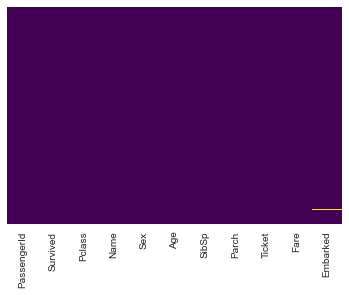

In [178]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis",cbar=False)

In [179]:

 df.dropna(inplace=True)

<AxesSubplot:>

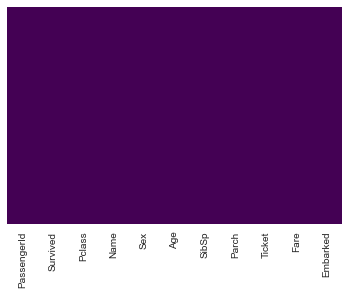

In [180]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis",cbar=False)

In [181]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Converting Categorical Feature

we'll need to convert categorical features to dummy variables using **pandas** Otherwise our machine learning alogrithm won't ba able to directlt take in those features as input

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [183]:
# pd.get_dummies(df["Embarked"],drop_first=True).head()

In [184]:
sex=pd.get_dummies(df["Sex"],drop_first=True)
embarked=pd.get_dummies(df["Embarked"],drop_first=True)

In [185]:
df.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [186]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [187]:
df=pd.concat([df,sex,embarked],axis=1)

In [188]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression Model

let's start by spliting our data into a traning set and test data set (thre is another test.csv file you can play around with in case you want to use all this data for traning)

# Train Test Split

In [189]:
df.drop("Survived",axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [190]:
df["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [192]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop("Survived",axis=1),df['Survived'],test_size=0.3,random_state=101)

# Training and predicting

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
logmodel= LogisticRegression()

In [197]:
logmodel.fit(X_train,Y_train)

C:\Users\aedum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [198]:
predictions=logmodel.predict(X_test)

In [202]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [201]:
accuracy=confusion_matrix(Y_test,predictions)
accuracy

array([[148,  15],
       [ 39,  65]], dtype=int64)

In [204]:
accuracy=accuracy_score(Y_test,predictions)

In [205]:
accuracy

0.797752808988764